In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import joblib
from joblib import Memory
import os

In [5]:
df = pd.read_csv('/content/data.csv')

In [6]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
df.tail()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


## Dropping duplicates

In [7]:
df.drop_duplicates(keep="first", inplace=True)

### Dropping unwanted colummn

In [8]:
df.drop(columns = ['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes', 'Down Votes', 'Month',], axis=1, inplace=True)
df.head()

,Review text,Ratings
0,"Nice product, good quality, but price is now r...",4
1,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Worst product. Damaged shuttlecocks packed in ...,1
3,"Quite O. K. , but nowadays the quality of the...",3
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(8510, 2)

Adding a column sentiments {whose rating>=3 is sentimented as 1 else 0)

In [11]:
df['sentiment'] = df['Ratings'].apply(lambda x: 1 if x >= 3 else 0)

In [12]:
df.head()

,Review text,Ratings,sentiment
0,"Nice product, good quality, but price is now r...",4,1
1,They didn't supplied Yonex Mavis 350. Outside ...,1,0
2,Worst product. Damaged shuttlecocks packed in ...,1,0
3,"Quite O. K. , but nowadays the quality of the...",3,1
4,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0


<Axes: xlabel='sentiment', ylabel='count'>

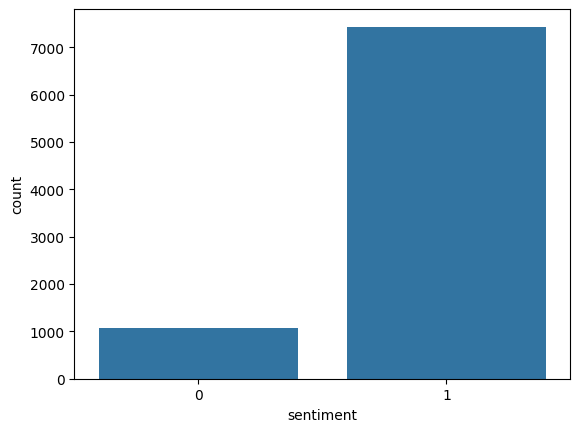

In [13]:
sns.countplot(x='sentiment', data=df)

WOrd cloud analysis

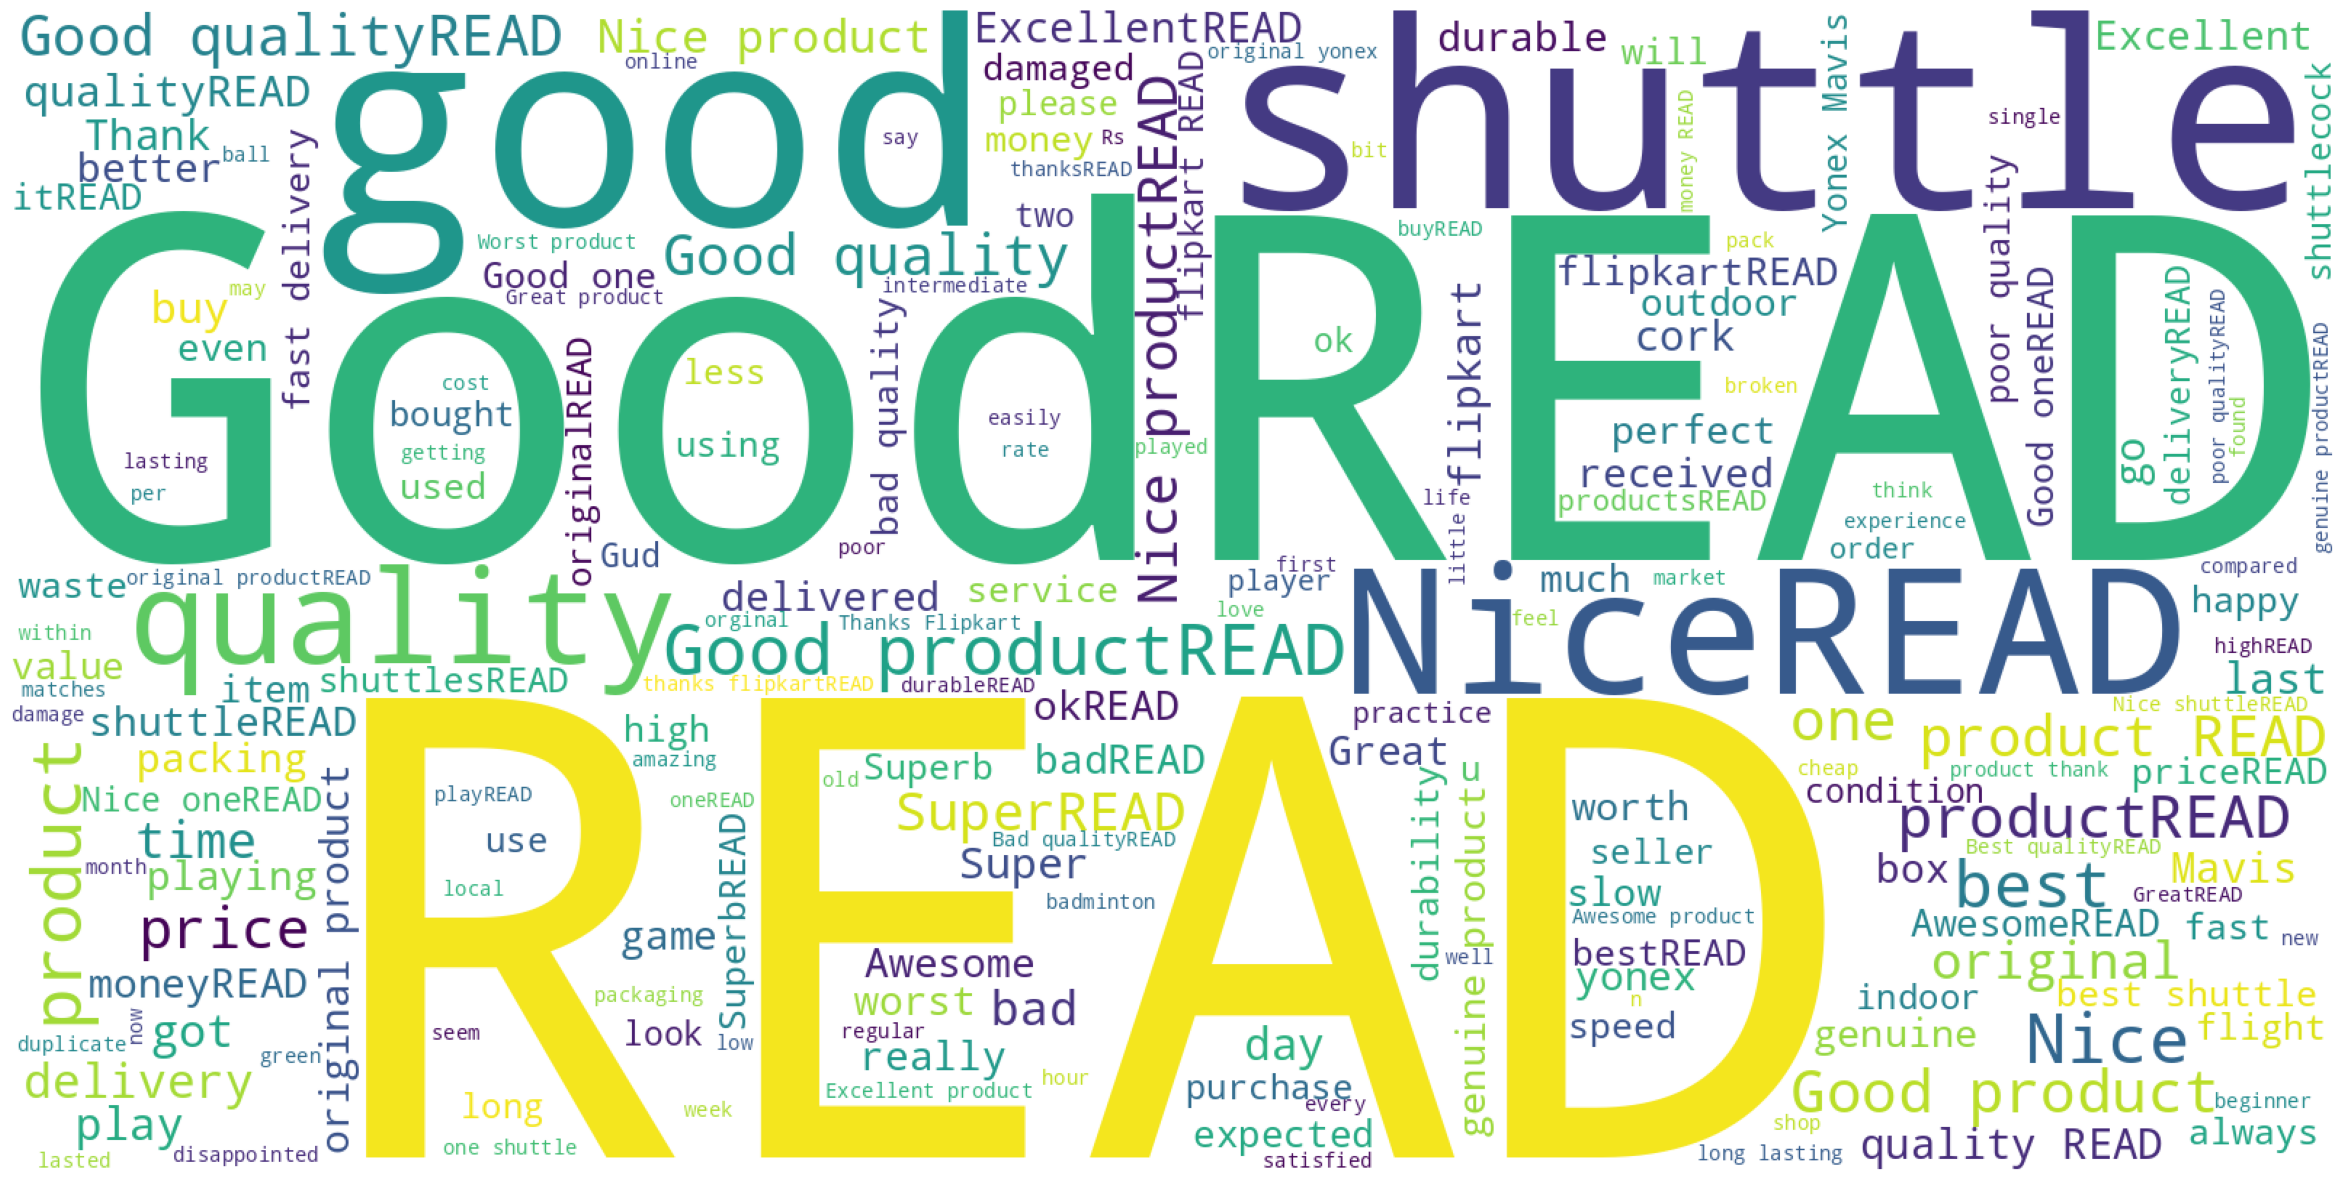

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['Review text'] = df['Review text'].astype(str)

wc = WordCloud(background_color='white',
               width=1600,
               height=800).generate(' '.join(df['Review text']))


plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

Model Development Phase

In [17]:
X = df['Review text']
y = df['sentiment']

Splitting into train test

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


NameError: name 'train_test_split' is not defined

In [19]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets.
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6382,) (6382,)
(2128,) (2128,)


Text Data Preprocessing function

In [20]:
def pp(doc): # doc is a string of text
    # This text contains a lot of READ MORE tags.
    doc = doc.replace("READ MORE", " ")

    # Remove punctuation and numbers.
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
#     doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

    # Converting to lower case
    doc = doc.lower()

    # Tokenization
    tokens = nltk.word_tokenize(doc)

    # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

    # Join and return
    return " ".join(filtered_tokens)

In [21]:

import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=pp)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


NameError: name 'X_train_dtm' is not defined

In [22]:
!pip install nltk

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate a vectorizer
vect = CountVectorizer(preprocessor=pp)

# use it to extract features from training data
%time X_train_dtm = vect.fit_transform(X_train)

print(X_train_dtm.shape)

CPU times: user 3.97 s, sys: 270 ms, total: 4.24 s
Wall time: 6.28 s
(6382, 2500)


In [32]:
X_test_dtm = vect.transform(X_test)

print(X_test_dtm.shape)

(2128, 2500)


Multinomial naive bayes model

In [33]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")

CPU times: user 5.93 ms, sys: 0 ns, total: 5.93 ms
Wall time: 9.68 ms


MultinomialNB()

calculate accuracy on train data

In [34]:
from sklearn import metrics
# make class predictions for X_train_dtm
y_train_pred = nb.predict(X_train_dtm)

metrics.accuracy_score(y_train, y_train_pred)

0.9359135067376998

calculate accuracy on test data

In [35]:
y_test_pred = nb.predict(X_test_dtm)

metrics.accuracy_score(y_test, y_test_pred)

0.9130639097744361

In [36]:
%time X_train_clean = X_train.apply(lambda doc: pp(doc))

CPU times: user 1.61 s, sys: 116 ms, total: 1.72 s
Wall time: 1.73 s


In [37]:
%time X_test_clean = X_test.apply(lambda doc: pp(doc))

CPU times: user 555 ms, sys: 36.7 ms, total: 591 ms
Wall time: 592 ms


In [41]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'svc': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory)
}
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'poly', 'rbf','sigmoid']

        }
    ],
    'knn': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__p': [1, 2]

        }
    ]
}

In [40]:

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import GridSearchCV

In [42]:
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train_clean, y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 11.9 s, sys: 111 ms, total: 12 s
Wall time: 16.8 s
Score on Test Data:  0.9515326172386692
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 23.2 s, sys: 145 ms, total: 23.4 s
Wall time: 24 s
Score on Test Data:  0.9519832985386221
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 10min 8s, sys: 680 ms, total: 10min 8s
Wall time: 10min 12s
Score on Test Data:  0.9351218176840953
********** svc **********
Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 9min 37s, sys: 861 ms, total: 9min 38s
Wall time: 9min 41s
Score on Test Data:  0.9535732916014606
********** knn **********
Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: user 10min 12s, sys: 51.7 s, total: 11min 4s
Wall time: 7min 42s
Score o

In [47]:
for name, model in best_models.items():
    print(f"****{name}****")
    print(f"{model}")
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    %time y_test_pred = model.predict(X_test_clean)
    print("Train Score (F1)",metrics.f1_score(y_train, y_train_pred))
    print("Test Score (F1)", metrics.f1_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes \n")

****naive_bayes****
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', MultinomialNB(alpha=1))])
CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 11.9 ms
Train Score (F1) 0.9637892872952634
Test Score (F1) 0.9515326172386692
Model Size: 154247 Bytes 

****decision_tree****
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])
CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 11.6 ms
Train Score (F1) 0.9637892872952634
Test Score (F1) 0.9519832985386221
Model Size: 62921 Bytes 

****logistic_regression****
Pipeline(memory=Memory(location=.cache/joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.4,

In [48]:
joblib.dump(model, f'best_models/{name}.pkl')

['best_models/knn.pkl']

In [49]:
model = joblib.load(f'best_models/{name}.pkl')

Let's evaluate a input on the basis of different model

In [50]:

model = joblib.load('best_models/knn.pkl')


new_data = ["best product "]

new_data_clean = [pp(doc) for doc in new_data]

prediction = model.predict(new_data)

print("Prediction:", prediction)

Prediction: [1]


### By analysing various algorithms on the various output the knn model is evaluation the correct .Hence we will use this in our app.py
